#  Heart Failure Classification:

DSCI Group 43 Members:
- Jellia Ma 11423324
- Hassan Anvery
- Rohan Badini 10082964
- Adyesha Singhdeo 89838973

## Introduction: 

Heart failure is a recently heated topic which is caused by the heart’s inability to pump blood efficiently. This can often lead to blood backing up into the lungs, further leading to shortness of breath and many other severe outcomes which might risk people's lives. Heart failure results from other diseases, such as coronary heart disease. A few ways of prevention are through lifestyle changes, such as exercising, reduction of sodium (salt) in the diet, and managing stress (Mayo Clinic).

In this project, we are trying to predict if a patient could have heart failure by looking at different indicators. Using the Kaggle dataset, the following indicators elicit a better prediction for heart failure. Firstly, age, because with maturity, the heart deteriorates and fatigues. Secondly, cholesterol levels, as having high amounts, can lead to artery walls closing up, causing the heart to stress. Finally, blood pressure, as high levels can cause stress on the heart (NIH). 

## Preliminary Exploratory Analysis:

- We displayed our data set in a tidy format. 
- We also used training data to be shown in a table and visualzied in a plot.

In [1]:
#inserting the necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Data Reading

In [2]:
heart_data <- read_csv("https://raw.githubusercontent.com/RohanBadini/DSCI-Group-43-Project/main/Datasets/heart_failure.csv")
heart_data

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


### Data Wrangling

We renamed the column names because column names are case sensitive in R. We have also deleted some columns (excercise_angina, old_peak, st_slope) which will not affect our future comparisons and predictions at all

In [3]:
#The column names in R should be case sensitive, therefore we have renamed the column names. 
heart_data <- rename(heart_data,
       age = Age, 
       sex = Sex, 
       chestpain_type = ChestPainType,
       resting_bp = RestingBP, 
       cholesterol = Cholesterol, 
       fasting_bs = FastingBS,
       resting_ecg = RestingECG,
       max_hr = MaxHR,
       excercise_angina = ExerciseAngina,
       old_peak = Oldpeak,
       st_slope = ST_Slope,
       heart_disease = HeartDisease) |>
select(-excercise_angina,-old_peak,-st_slope)

heart_data

age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,heart_disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
40,M,ATA,140,289,0,Normal,172,0
49,F,NAP,160,180,0,Normal,156,1
37,M,ATA,130,283,0,ST,98,0
48,F,ASY,138,214,0,Normal,108,1
54,M,NAP,150,195,0,Normal,122,0
39,M,NAP,120,339,0,Normal,170,0
45,F,ATA,130,237,0,Normal,170,0
54,M,ATA,110,208,0,Normal,142,0
37,M,ASY,140,207,0,Normal,130,1


We will be predicting the outcome of whether the person has heart disease or not.                                         
In which,**1** means "Yes, the person has heart disease" and **0** means "No, the person don't have heart disease"

Since, we are using 0 and 1 as outcomes. We have converted the values from vector to categorical values.

In [4]:
heart_data <- heart_data |>
mutate(heart_disease = as_factor(heart_disease)) |>
mutate(fasting_bs = as_factor(fasting_bs)) |> 
mutate(sex = as_factor(sex)) 

heart_data

age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,heart_disease
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<fct>
40,M,ATA,140,289,0,Normal,172,0
49,F,NAP,160,180,0,Normal,156,1
37,M,ATA,130,283,0,ST,98,0
48,F,ASY,138,214,0,Normal,108,1
54,M,NAP,150,195,0,Normal,122,0
39,M,NAP,120,339,0,Normal,170,0
45,F,ATA,130,237,0,Normal,170,0
54,M,ATA,110,208,0,Normal,142,0
37,M,ASY,140,207,0,Normal,130,1


### Exploratory Data Analysis:

**Splitting the dataset into training dataset and testing dataset**

In [5]:
set.seed(999)
#Here, we have splited the data into Training dataset and Testing  dataset
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

In [6]:
head(heart_train)
head(heart_test)

age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,heart_disease
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<fct>
37,M,ATA,130,283,0,ST,98,0
39,M,NAP,120,339,0,Normal,170,0
45,F,ATA,130,237,0,Normal,170,0
54,M,ATA,110,208,0,Normal,142,0
48,F,ATA,120,284,0,Normal,120,0
37,F,NAP,130,211,0,Normal,142,0


age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,heart_disease
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<fct>
40,M,ATA,140,289,0,Normal,172,0
49,F,NAP,160,180,0,Normal,156,1
54,M,NAP,150,195,0,Normal,122,0
37,M,ASY,140,207,0,Normal,130,1
43,F,ATA,120,201,0,Normal,165,0
36,M,ATA,120,267,0,Normal,160,1


In [7]:
#Calculating the sex ratio of the overall data
heart_data_analysis <- heart_train |> 
group_by(sex) |>
summarize(n = n())
heart_data_analysis

sex,n
<fct>,<int>
M,544
F,144


Here, we are creating a model using a training data of 544 males and 144 females. 

In [8]:
heart_data_analysis2 <- heart_train |> 
filter(cholesterol >= 240) |>
group_by(heart_disease)|>
summarize(n = n())
heart_data_analysis2

heart_disease,n
<fct>,<int>
0,129
1,141


As per the article on "www.hopkinsmedicine.org", cholesterol of 240 mg/dL or more is considered to be high cholesterol levels and people with high cholesterol levels are more likely to have heart failure(John Hopkins Medicine).

We can observe that there are 270 individuals with cholesterol levels of 240 mg/dL or higher in the data. 141 individuals suffer from heart failure in that data. So, it's safe to assume that there's around 50% probability that someone with high cholesterol may eventually develop heart failures.

### Comparing Age vs. Resting Blood Pressure

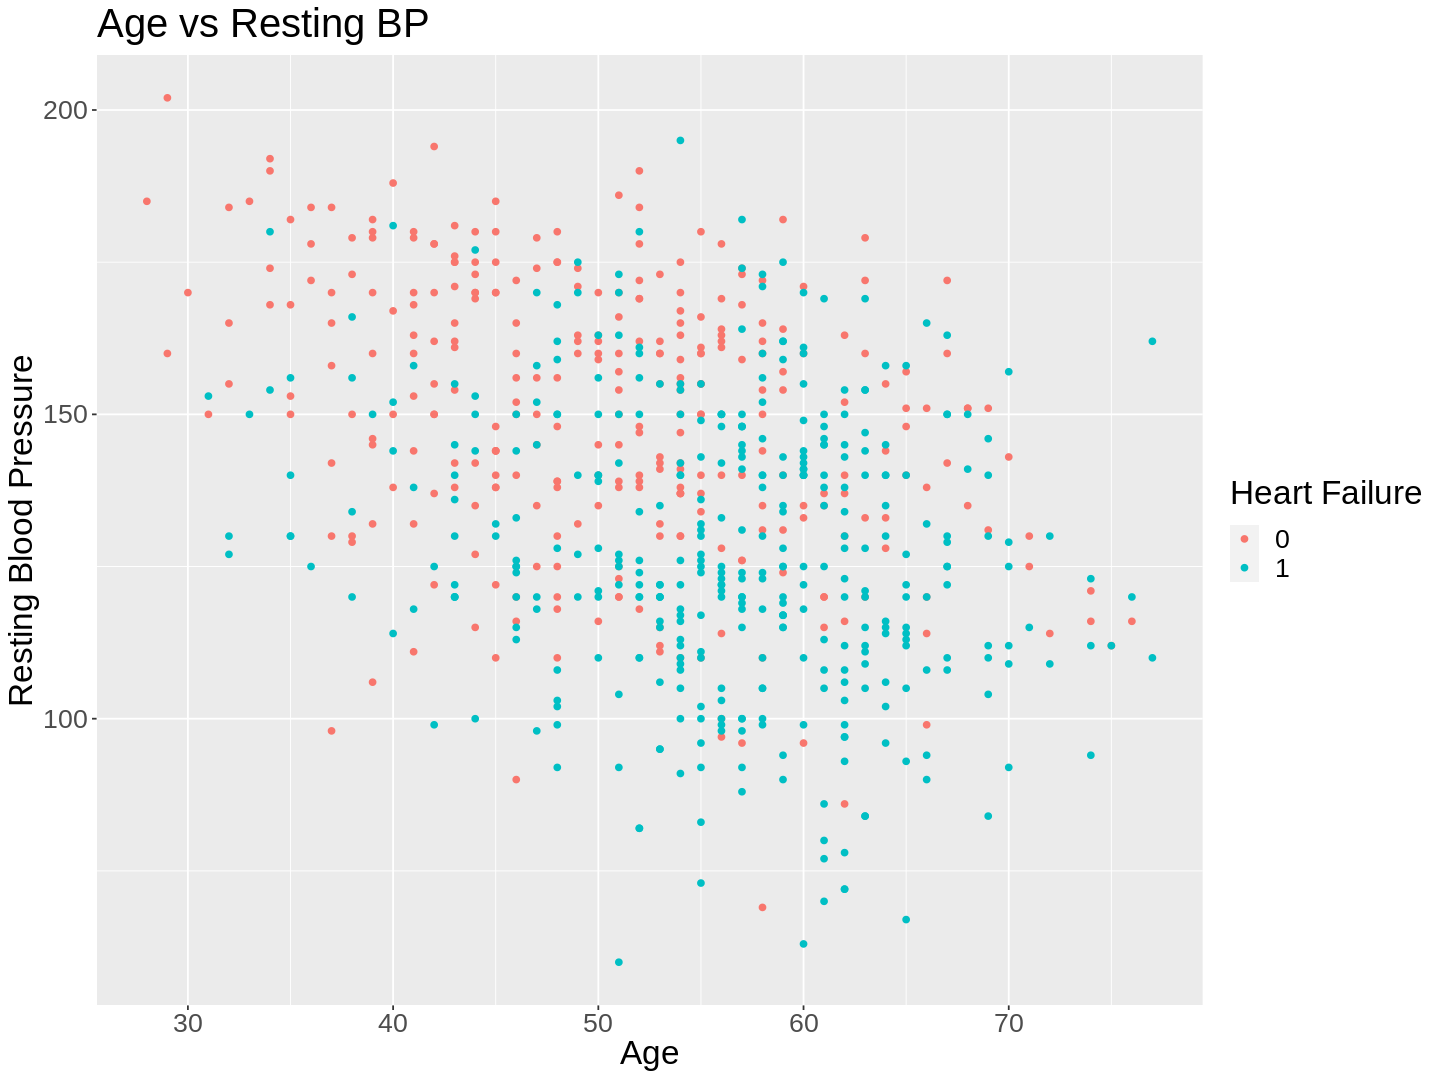

In [9]:
options(repr.plot.width = 12, repr.plot.height = 9)

agevsrestingbp_plot <- heart_train |>
    ggplot(aes( x = age , y = max_hr, colour = heart_disease)) + 
    geom_point() + 
    labs(x = "Age", y = "Resting Blood Pressure", colour= "Heart Failure") +
    ggtitle("Age vs Resting BP") +
    theme(text = element_text(size=20))

agevsrestingbp_plot

## Methods:


Using the heart failure dataset, we would like to use data analysis methods to predict whether a person has heart disease or not. In the dataset of heart_failure, the column of heart disease contains categorical values. "1" refers to heart disease, and "0" to no heart disease. We plan to use the columns of Age, Resting BP, Cholesterol and MaxHR as predictors to predict the classification of the observations as 1 (heart disease) or 0 (no heart disease). 

The justification for using each of these columns as predictors is listed below:

**Age**- Scientists have determined a relationship between age and heart disease likelihood. Research states that adults over 65 are more likely to suffer from cardiovascular disease. This is because aging can cause changes in the heart and blood vessels, such as stiffening of the heart and blood vessels, which may increase a person's risk of developing cardiovascular disease (Lakatta et al., 2003).

**Resting BP**: Resting BP (mm Hg) stands for resting blood pressure. Blood pressure measures the force the blood uses to get through the arteries. There exists a positive relationship between resting blood pressure and heart disease. High blood pressure is a significant risk factor for cardiovascular disease (Cleveland Clinic, 2022).

**Cholesterol**: This column measures serum cholesterol in mm/dl. Cholesterol is a fatty lipid that is essential in the process of making hormones and vitamins. However, high cholesterol levels can cause an accumulation of fatty deposits in blood vessels that make it difficult for blood to flow through the arteries. This causes an increase in blood pressure and can increase the risk of heart disease (Kinosian et al., 1994).

We plan to build a classification model from this dataset. It will, when given the values for the predictor columns for an individual, try to predict whether the person has heart disease or not. The classification will be displayed via number where **1** means *"The person has heart disease"* and **0** means *"The person does not have heart disease."*

## Expected Outcomes and Significance:

After predicting from our model, we are expected to find that people with higher age, cholesterol level, blood pressure and maximum heart rate are more likely to have heart diseases.

We are expected to conclude that there is a linear relationship between the variables listed above and the outcome of having heart disease. A public scientific concern can be aroused that people should pay attention to their cholesterol level, the normal blood pressure level and the maximum heart rate they can achieve. They should go to the hospital to check in at an early stage to prevent more severe attacks from happening to them. Medical organizations like hospitals can probably give reminders or warnings to patients whose results show they have a high level of one of the variables mentioned above. They can give professional suggestions based on the individuals’ current health conditions in their case reports.

Some questions can be aroused for future investigations. For example, does the increasing age causes an inevitable incline in heart disease risks? Is there a way to help older people prevent heart disease or reduce the severity of the risk? How can early identification of heart disease risk help mitigate health concerns? How can we use the current technology to identify and predict heart disease risk and treat patients during their early stages? 

## References:

- Fedesoriano. (2021, September). *Heart Failure Prediction Dataset.* Retrieved from https://www.kaggle.com/fedesoriano/heart-failure-prediction. 

- Lakatta, E. G., & Levy, D. (2003). Arterial and cardiac aging: major shareholders in cardiovascular disease enterprises: Part II: the aging heart in health: links to heart disease. *Circulation,* 107(2), 346-354.

- *What is blood pressure?* Cleveland Clinic. (n.d.). Retrieved October 29, 2022, from https://my.clevelandclinic.org/health/diseases/17649-blood-pressure 

- Kinosian, B., Glick, H., & Garland, G. (1994). Cholesterol and coronary heart disease: predicting risks by levels and ratios. *Annals of internal medicine,* 121(9), 641-647.

- *Lipid panel.* Lipid Panel | Johns Hopkins Medicine. (2020, December 4). Retrieved October 29, 2022, from https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL 

- Mayo Foundation for Medical Education and Research. (2021, December 10). *Heart failure.* Mayo Clinic. Retrieved October 29, 2022, from https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142 

- U.S. Department of Health and Human Services. (n.d.). *Heart health and aging.* National Institute on Aging. Retrieved October 29, 2022, from https://www.nia.nih.gov/health/heart-health-and-aging 